Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.4605 - loss: 1.3411 - val_accuracy: 0.7644 - val_loss: 0.6825
Epoch 2/5
  1/108 ━━━━━━━━━━━━━━━━━━━━ 4:08 2s/step - accuracy: 0.7812 - loss: 0.7102

c:\Users\dhaks\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


108/108 ━━━━━━━━━━━━━━━━━━━━ 64s 572ms/step - accuracy: 0.7812 - loss: 0.7102 - val_accuracy: 0.7584 - val_loss: 0.7010
Epoch 3/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.7404 - loss: 0.7231 - val_accuracy: 0.7981 - val_loss: 0.5513
Epoch 4/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 60s 543ms/step - accuracy: 0.8750 - loss: 0.4433 - val_accuracy: 0.7909 - val_loss: 0.5629
Epoch 5/5
108/108 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.8172 - loss: 0.5280 - val_accuracy: 0.8197 - val_loss: 0.5056
Found 4317 images belonging to 5 classes.
134/134 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4261961..0.47145492].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.59239614].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.59239614].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.59239614].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.59239614].


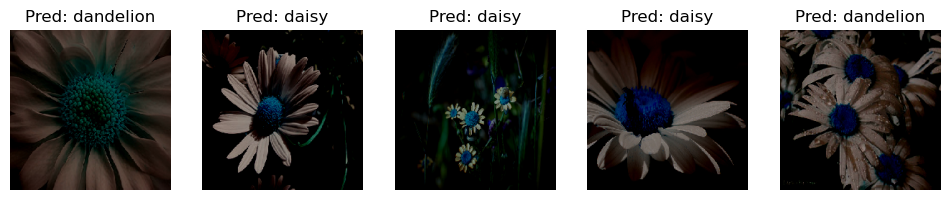

Test Accuracy: 0.8197115659713745


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

train_dir = r'C:\Users\loalo\OneDrive\training\Level_24_\flowers'

IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=5
)

test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode=None,
    shuffle=False
)

predictions = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE)
predicted_classes = np.argmax(predictions, axis=1)

def plot_sample_predictions(generator, predictions, num_samples=5):
    plt.figure(figsize=(12, 12))
    class_indices = list(train_generator.class_indices.keys())
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        img = next(generator)[0] 
        plt.imshow(img)
        plt.title(f'Pred: {class_indices[predicted_classes[i]]}')
        plt.axis('off')
    plt.show()

test_generator.reset()

plot_sample_predictions(test_generator, predictions)

print(f"Test Accuracy: {history.history['val_accuracy'][-1]}")
